In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import pandas as pd

In [13]:
#We set the seed for reproducibility
np.random.seed(1)

In [23]:
S0 = 100 # initial stock price
mu= 0.1 # drift term
sigma = 0.25 # volatility/dispersion term
T = 5 # time horizon
N = 5000 # number of time steps

We create two variables vectors U1 & U2 with N numbers between [0,1] in a uniform distribution

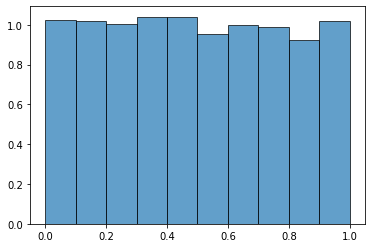

In [75]:
U1 = np.random.rand(N) # uniform random numbers
U2 = np.random.rand(N) # uniform random numbers
plt.hist(U1,density=True, edgecolor='black', alpha=0.7)
plt.show()

Box-Müller transformation of U1 & U2 which results in a vector with random N numbers
in a standard normal distribution

In [25]:
X1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2) # standard normal random numbers
#or
X2 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2) # standard normal random numbers

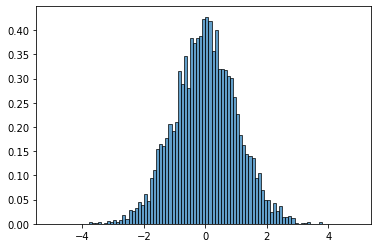

In [73]:
#We plot X1 to check that it is normally distributed
plt.hist(X1, bins=np.arange(-5, 5, 0.1),density=True, edgecolor='black', alpha=0.7)
plt.show()

Compare the empirical density function with the true normal density function function

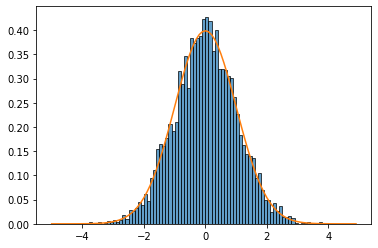

In [72]:
plt.hist(X1, bins=np.arange(-5, 5, 0.1), density=True, edgecolor='black', alpha=0.7)
x1 = np.arange(-5, 5, 0.1)
plt.plot(x1, scipy.stats.norm.pdf(x1))
plt.show()

Compute the mean and variance of X1, which should be close to mean=0 and variance= 1, as N~(0,1)

The difference lies in the N parameter, the larger N, the closer we should get the the standard mean and variance values of 0 and 1

In [28]:
mean = np.mean(X1)
var = np.var(X1)
print(mean, var)

-0.004157083004382528 1.0301269332113634


Now calculate stock prices (ST)

In [39]:
ST = S0*np.exp((mu-(sigma**2)/2)*T + sigma*np.sqrt(T)*X1) # stock price at time T

ST[0:10]#print the first 10 elements of ST


array([182.8006409 , 111.46784259, 246.15628646,  66.39516682,
       279.20646683, 253.57720866, 125.13348449, 127.73865142,
       265.2023883 ,  72.7126635 ])

In [55]:
np.mean(ST)
np.std(ST)

print(np.mean(ST), np.std(ST))


165.2722011858382 102.31377893497658


Comparing the above (sample moments) with the true moments we should get a similar number

In [57]:
mST = S0 * math.exp(mu * T) #true moments mean
vST = S0 ** 2 * math.exp(2 * mu * T) * (math.exp(sigma ** 2 * T) - 1) #true moments variance
sdST = np.sqrt(vST) #true moments standard deviation

print(mST,sdST)

164.87212707001282 99.85834514361125


Summary stats from our predicted stock prices

In [66]:
scipy.stats.describe(ST) 

#one can also get the summary statistics by trasnforming the array to a pandas
# dataframe and using the describe function in pandas package

df = pd.DataFrame(ST)
df.describe()

,0
count,5000.000000
mean,165.272201
std,102.324012
min,17.303113
25%,96.459256
50%,140.957529
75%,206.049268
max,1156.955274


We plot the histogram of the simulated stock price and 

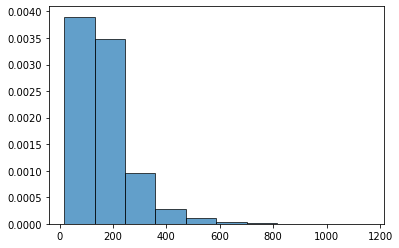

In [71]:

plt.hist(ST,density=True, edgecolor='black', alpha=0.7)
plt.show()


Now we cap the distribution at 800, and plot it againts the normal distribution line, we see that the left tail is trimmed, as the prices dont go negative. Also, apex of out ST distribution does not match the normal distribution line

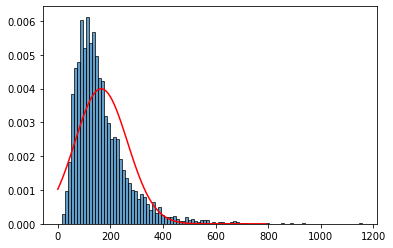

In [70]:
# Create a histogram of the ST array
n, bins, patches = plt.hist(ST, bins=100, density=True, edgecolor='black', alpha=0.7)

# Create a sequence of values for s1
s1 = np.arange(0, 800, 8)

# Plot a line on the histogram, representing the normal distribution with mean mST and standard deviation sdST
plt.plot(s1, scipy.stats.norm.pdf(s1, mST, sdST),'r')

# Display the plot
plt.show()

Now, we compare the empirical density for ST with the theoretically correct log-normal density function. 
We will see that the log-normal density function is a better fit for the empirical density function

<ipython-input-77-f77d028df077>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(s1, np.exp(-(np.log(s1) - m)**2/2/s**2)/s/np.sqrt(2*np.pi)/s1, color='red')
<ipython-input-77-f77d028df077>:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(s1, np.exp(-(np.log(s1) - m)**2/2/s**2)/s/np.sqrt(2*np.pi)/s1, color='red')


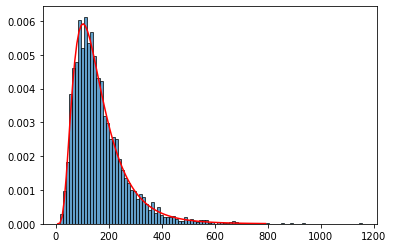

In [77]:

s = np.sqrt(np.log(vST/mST**2+1))
m = np.log(mST)-s**2/2

plt.plot(s1, np.exp(-(np.log(s1) - m)**2/2/s**2)/s/np.sqrt(2*np.pi)/s1, color='red')
plt.show()
